# QUESTION 5

## Install the Required Package¶

In [4]:
from sklearn.impute import SimpleImputer

import pandas as pd 
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import sklearn.linear_model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## Problem identification

# Each row in credit.csv corresponds to a credit card customer information. A credit card company wants to create a regression model using this data to determine customers' credit card limits. 

### To create a suitable model, use simple, multiple, and decision tree regression techniques.  

## Features Description


1.	Income	
2.	Limit	
3.	Rating	
4.	Cards	
5.	Age	
6.	Education	
7.	Gender	
8.	Student	
9.	Married	
10.	Ethnicity	
11.	Balance


# 

# Import the dataset

## 3 Data Understanding

## 3.1 Gathering the data

In [6]:
df = pd.read_csv('credit_dataset.csv')

In [7]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
df.shape

(400, 11)

## 

## 3.2 Describing the data

In [9]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


## 

# 3.3 Exploring the data

In [11]:
df.describe(include="all")

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [12]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [13]:
gender_counts = df['Gender'].value_counts()

In [14]:
gender_counts

Female    207
Male      193
Name: Gender, dtype: int64

In [15]:
student_counts = df['Student'].value_counts()
student_counts

No     360
Yes     40
Name: Student, dtype: int64

In [16]:
married_counts = df['Married'].value_counts()
married_counts

Yes    245
No     155
Name: Married, dtype: int64

In [17]:
ethnicity_counts = df['Ethnicity'].value_counts()
ethnicity_counts

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Limit'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'Cards'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Balance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

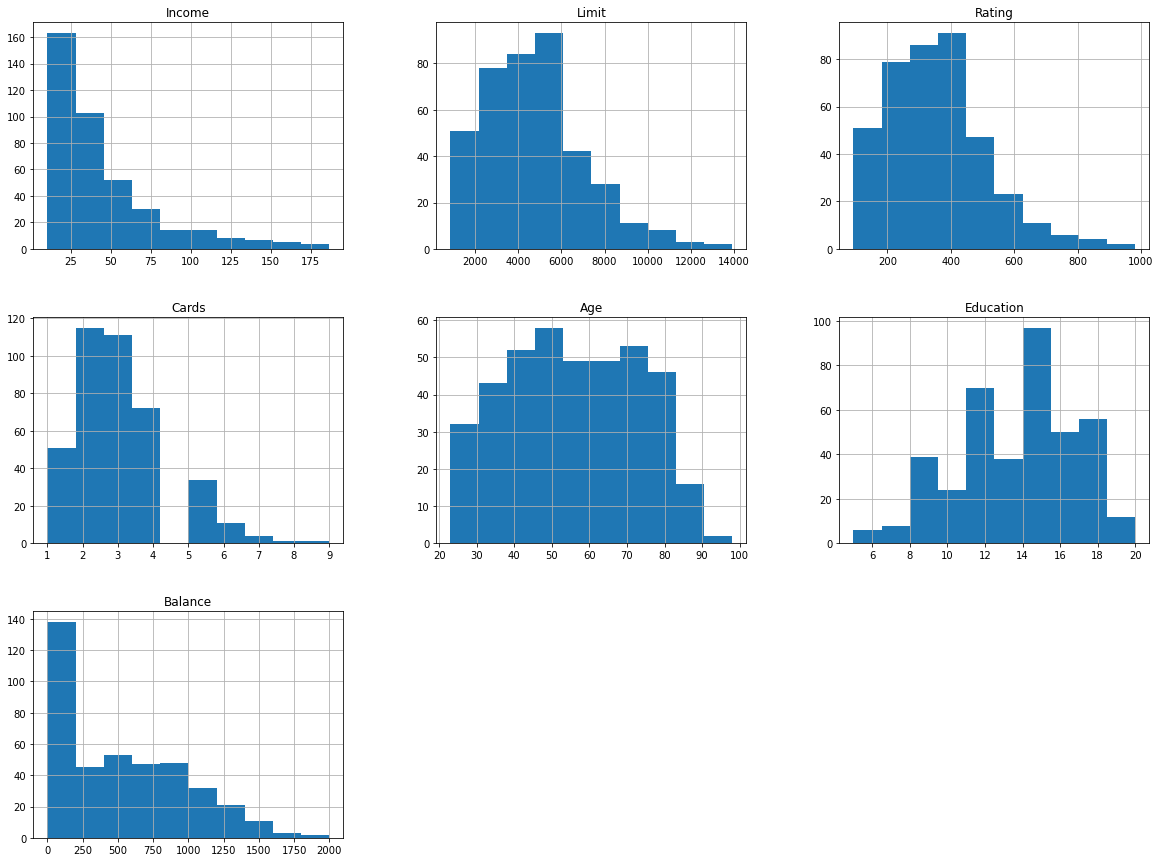

In [18]:
df.hist(bins=10, figsize=(20,15))

In [49]:
df.skew()

C:\Users\Meire\AppData\Local\Temp\ipykernel_9996\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Income       1.742117
Limit        0.837493
Rating       0.865394
Cards        0.791928
Age          0.011496
Education   -0.329212
Balance      0.584595
dtype: float64

Skewness > 0 is positively skewed we have more lower values for that data

Skewness = 0 is our data is symmetric

Skewness < 0 is negatively skewed which means more high values

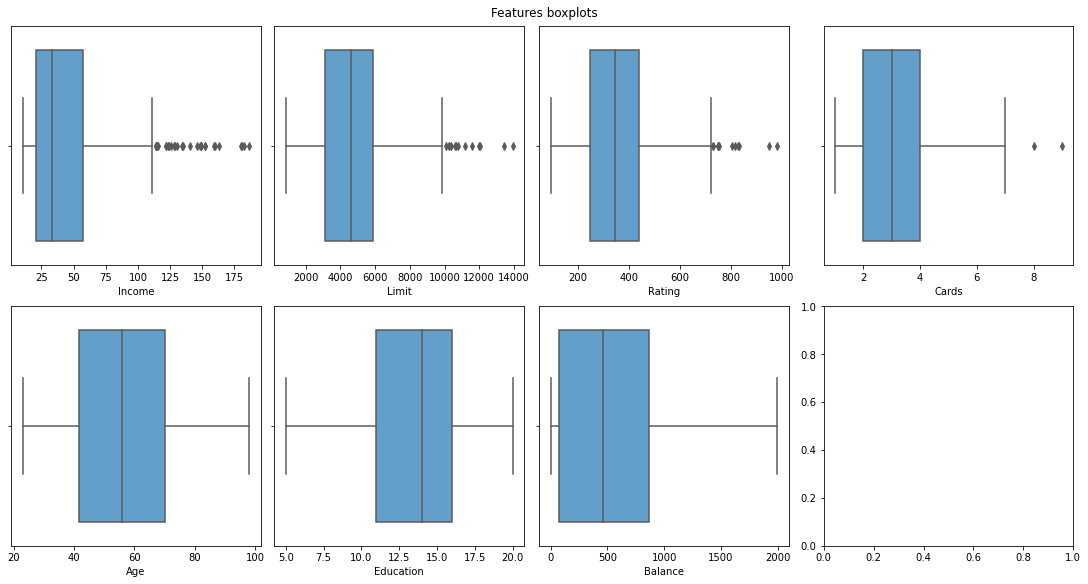

In [51]:
fig, ax = plt.subplots(nrows=2,ncols=4, figsize=(15,8), constrained_layout=True)
plt.suptitle("Features boxplots")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color='#51A2DB')

## Visualising the Unique Values

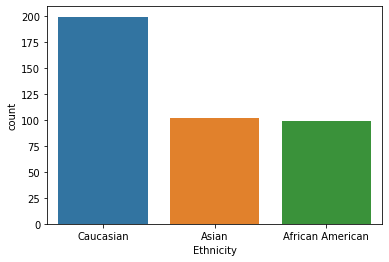

In [15]:





plt = sns.countplot(x='Ethnicity', data=df);

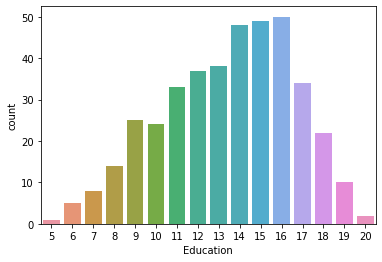

In [16]:
plt = sns.countplot(x='Education', data=df);

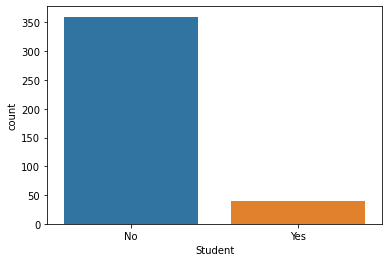

In [17]:
plt = sns.countplot(x='Student', data=df);

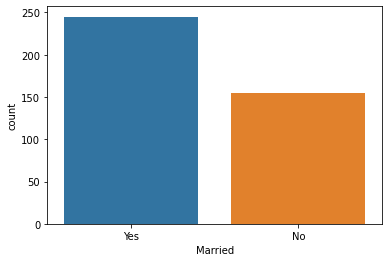

In [18]:
plt = sns.countplot(x='Married', data=df);

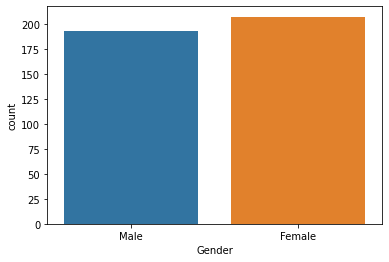

In [19]:
plt = sns.countplot(x='Gender', data=df);

In [20]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


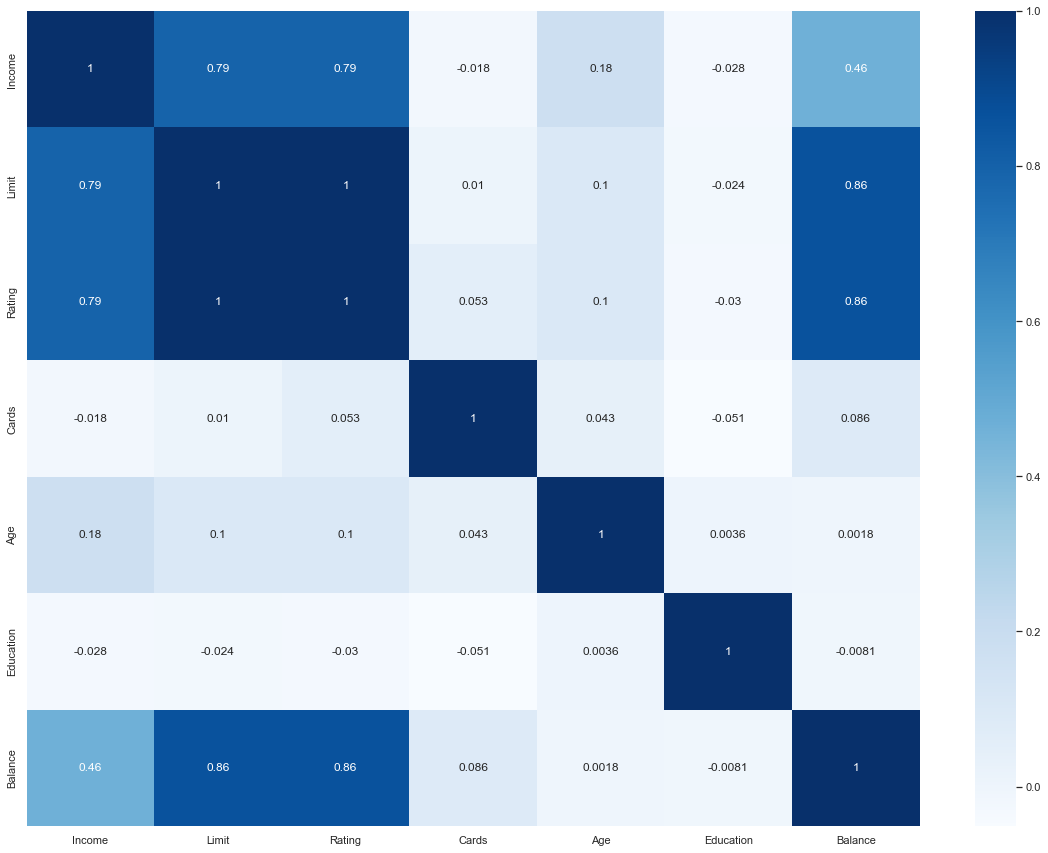

In [21]:
sns.set(rc={"figure.figsize":(20, 15)})
sns.heatmap(df.corr(), cmap='Blues', annot=True);

In [22]:
plt.scatter(df.Limit,df.Income)


## 

# Data Preprocessing

# 3.4 Data Quality

In [23]:
##Function to find out the percentage of null values in the dataframe

NullValues=df.isnull().sum()/len(df)

In [24]:
NullValues

Income       0.0
Limit        0.0
Rating       0.0
Cards        0.0
Age          0.0
Education    0.0
Gender       0.0
Student      0.0
Married      0.0
Ethnicity    0.0
Balance      0.0
dtype: float64

In [25]:
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [26]:
df.isnull().any()

Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
Balance      False
dtype: bool

In [27]:
df.duplicated().sum()

0

In [28]:
df.duplicated().any()

False

# 

## Encoding the Data

In [29]:
#Creating a new DataFrame to convert the categorical variables
df1 = pd.DataFrame(df)

In [30]:
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [31]:
##I will be using the One Hot-Encoder to convert the categorical variables
df1 = pd.get_dummies(df1, columns=['Gender', 'Student', 'Married'],drop_first=True)

In [32]:
##I will be using the Label - Encoder to convert the Ethnicity column to a numerical format
label_enc = LabelEncoder()

In [33]:
df1.Ethnicity = label_enc.fit_transform(df1.Ethnicity)

In [34]:
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Ethnicity,Balance,Gender_Male,Student_Yes,Married_Yes
0,14.891,3606,283,2,34,11,2,333,1,0,1
1,106.025,6645,483,3,82,15,1,903,0,1,1
2,104.593,7075,514,4,71,11,1,580,1,0,0
3,148.924,9504,681,3,36,11,1,964,0,0,0
4,55.882,4897,357,2,68,16,2,331,1,0,1


# 

# 4 Preparing data for machine learning

## Feature Selection

I will be using the Correlation Matrix to select the best column to be used in the machine learning models

In [35]:
corr_matrix = df1.corr()

corr_matrix['Limit'].sort_values(ascending=False)

Limit          1.000000
Rating         0.996880
Balance        0.861697
Income         0.792088
Age            0.100888
Married_Yes    0.031155
Cards          0.010231
Student_Yes   -0.006015
Gender_Male   -0.009397
Ethnicity     -0.020837
Education     -0.023549
Name: Limit, dtype: float64

In [36]:
df1.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Ethnicity',
       'Balance', 'Gender_Male', 'Student_Yes', 'Married_Yes'],
      dtype='object')

In [37]:
df1.dtypes

Income         float64
Limit            int64
Rating           int64
Cards            int64
Age              int64
Education        int64
Ethnicity        int32
Balance          int64
Gender_Male      uint8
Student_Yes      uint8
Married_Yes      uint8
dtype: object

In [38]:
features = ['Income']

For the features variables selection, we are going to use the Balance column, which has 0.792088 correlation to the target column.

In [39]:

limit_scaled= pd.DataFrame(df1["Limit"])

limit_scaled

,Limit
0,3606
1,6645
2,7075
3,9504
4,4897
...,...
395,4100
396,3838
397,4171
398,2525


In [40]:
# Separating out the features
x_data =df1[features].values
x_data

array([[ 14.891],
       [106.025],
       [104.593],
       [148.924],
       [ 55.882],
       [ 80.18 ],
       [ 20.996],
       [ 71.408],
       [ 15.125],
       [ 71.061],
       [ 63.095],
       [ 15.045],
       [ 80.616],
       [ 43.682],
       [ 19.144],
       [ 20.089],
       [ 53.598],
       [ 36.496],
       [ 49.57 ],
       [ 42.079],
       [ 17.7  ],
       [ 37.348],
       [ 20.103],
       [ 64.027],
       [ 10.742],
       [ 14.09 ],
       [ 42.471],
       [ 32.793],
       [186.634],
       [ 26.813],
       [ 34.142],
       [ 28.941],
       [134.181],
       [ 31.367],
       [ 20.15 ],
       [ 23.35 ],
       [ 62.413],
       [ 30.007],
       [ 11.795],
       [ 13.647],
       [ 34.95 ],
       [113.659],
       [ 44.158],
       [ 36.929],
       [ 31.861],
       [ 77.38 ],
       [ 19.531],
       [ 44.646],
       [ 44.522],
       [ 43.479],
       [ 36.362],
       [ 39.705],
       [ 44.205],
       [ 16.304],
       [ 15.333],
       [ 3

In [41]:
# Separating out the target
y_data = limit_scaled["Limit"].values
y_data

array([ 3606,  6645,  7075,  9504,  4897,  8047,  3388,  7114,  3300,
        6819,  8117,  1311,  5308,  6922,  3291,  2525,  3714,  4378,
        6384,  6626,  2860,  6378,  2631,  5179,  1757,  4323,  3625,
        4534, 13414,  5611,  5666,  2733,  7838,  1829,  2646,  2558,
        6457,  6481,  3899,  3461,  3327,  7659,  4763,  6257,  6375,
        7569,  5043,  4431,  2252,  4569,  5183,  3969,  5441,  5466,
        1499,  1786,  4742,  4779,  3480,  5294,  5198,  3089,  1671,
        2998,  2937,  4160,  9704,  5099,  5619,  6819,  3954,  7402,
        4923,  4523,  5390,  3180,  3293,  3254,  6662,  2101,  3449,
        4263,  4433,  1433,  2906, 12066,  6340,  2271,  4307,  7518,
        5767,  6040,  2832,  5435,  3075,   855,  5382,  3388,  2963,
        8494,  3736,  2433,  7582,  9540,  4768,  3182,  1337,  3189,
        6033,  3261,  3271,  2959,  6637,  6386,  3326,  4828,  2117,
        9113,  2161,  1410,  1402,  8157,  7056,  1300,  2529,  2531,
        5533,  3411,

# Model Creation

## Split dataset into training and testing sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=42)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 1) (280,)
(120, 1) (120,)


## Simple Linear Regression

In [44]:
simple_linear_model = LinearRegression()

In [45]:
simple_linear_model.fit(X_train,y_train)

LinearRegression()

## Model Valuation

In [46]:
simple_prediction_model = simple_linear_model.predict(X_test)

In [47]:
simple_prediction_model

array([10606.35183606,  5229.13355645,  4026.83587239,  3654.48044914,
        3214.46372388,  4691.06250886,  7454.97212993,  4389.26036261,
        7162.33699878,  3757.28197572,  6192.76145426,  5219.09349228,
        5430.97158555,  3566.95728107,  3585.72783582,  4724.78402873,
        9301.85284665,  7096.5854916 ,  3686.18304306,  3755.80870544,
        3457.66245211,  3411.4454176 ,  6316.40702711,  4769.52779295,
        3127.81360487,  3044.4919854 ,  3214.62742058,  3138.0719313 ,
        2893.01797382,  3179.92372052,  2975.30284755,  9420.20555958,
       12157.7600122 ,  6477.15718492,  3174.19433608,  4234.73067934,
        6093.99777957,  3111.6621973 ,  4626.51144413,  7328.54371321,
        7869.39760467,  4111.35793432,  3986.18452563,  3084.1065864 ,
        3606.95384104,  3669.81337322,  3143.80131575,  4830.85948928,
        3412.20933553,  3127.59534261,  3380.9978317 ,  3683.67302701,
        4572.38240254,  3673.36013502,  3919.50540382,  3059.93404061,
      

We can see from the simple linear regression prediction above as expected, the simple linear model has generated random numeric values that are going to help us to predict and determine the customers' credit card limits.  

## Visualising the correlation

In [48]:
plt.scatter(y_test, simple_prediction_model)

In [49]:
# Fit a linear regression model
slope, intercept = np.polyfit(y_test, simple_prediction_model, 1)

In [50]:
# Add the line of best fit
plt.plot(simple_prediction_model, slope*simple_prediction_model + intercept, color='red')

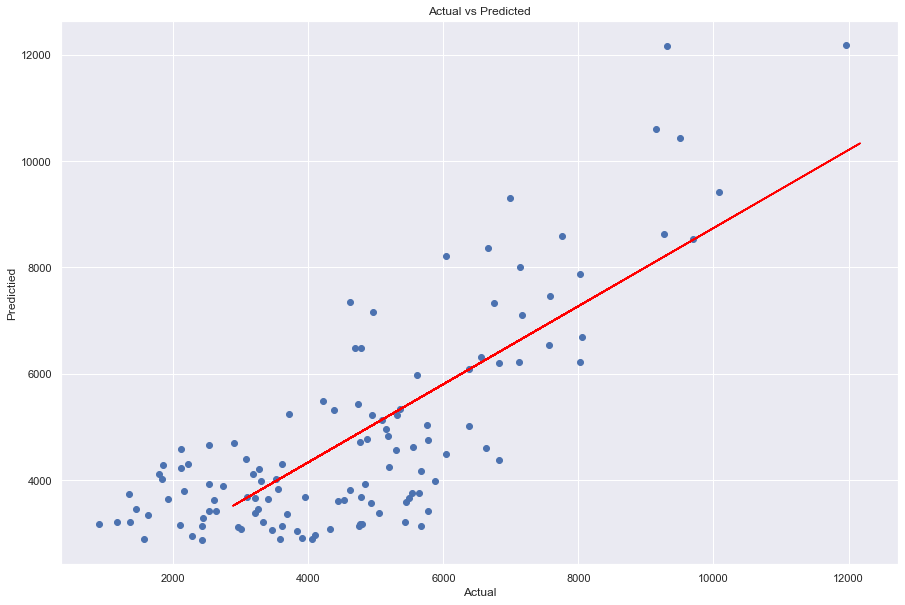

In [79]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, simple_prediction_model)
slope, intercept = np.polyfit(y_test, simple_prediction_model, 1)
plt.plot(simple_prediction_model, slope*simple_prediction_model + intercept, color='red')
plt.xlabel('Actual')
plt.ylabel('Predictied')
plt.title('Actual vs Predicted')

plt.show()

In [52]:
print('MSE:', mean_squared_error(y_test, simple_prediction_model))
print('R-squared:', r2_score(y_test, simple_prediction_model))

MSE: 1860474.2055559128
R-squared: 0.5998357475575693


After having ran the mean square error and r2 score functions, the MSE has shown a percentage of 1860474 of error compared to R-squared which has given a percentage of 0.5998357475575693 correlation between the two variables. Therefore, we can say that both columns have a positve weak correlation compared to the Correlation Matrix box above, which is 0.79.  

# 

## Multiple Linear Regression

For the multiple linear regression model, it has been decided to use the Income, Rating, Cards, Age columns for our features variables because they have strong correlation with the target column.

In [53]:
features = ['Income', 'Rating', 'Cards', 'Age']

In [54]:
x_data = df1[features].values


x_data


array([[ 14.891, 283.   ,   2.   ,  34.   ],
       [106.025, 483.   ,   3.   ,  82.   ],
       [104.593, 514.   ,   4.   ,  71.   ],
       ...,
       [ 57.872, 321.   ,   5.   ,  67.   ],
       [ 37.728, 192.   ,   1.   ,  44.   ],
       [ 18.701, 415.   ,   5.   ,  64.   ]])

In [55]:
limit_scaled= pd.DataFrame(df1["Limit"])

limit_scaled

,Limit
0,3606
1,6645
2,7075
3,9504
4,4897
...,...
395,4100
396,3838
397,4171
398,2525


In [56]:
# Separating out the target
y_data = limit_scaled["Limit"].values
y_data

array([ 3606,  6645,  7075,  9504,  4897,  8047,  3388,  7114,  3300,
        6819,  8117,  1311,  5308,  6922,  3291,  2525,  3714,  4378,
        6384,  6626,  2860,  6378,  2631,  5179,  1757,  4323,  3625,
        4534, 13414,  5611,  5666,  2733,  7838,  1829,  2646,  2558,
        6457,  6481,  3899,  3461,  3327,  7659,  4763,  6257,  6375,
        7569,  5043,  4431,  2252,  4569,  5183,  3969,  5441,  5466,
        1499,  1786,  4742,  4779,  3480,  5294,  5198,  3089,  1671,
        2998,  2937,  4160,  9704,  5099,  5619,  6819,  3954,  7402,
        4923,  4523,  5390,  3180,  3293,  3254,  6662,  2101,  3449,
        4263,  4433,  1433,  2906, 12066,  6340,  2271,  4307,  7518,
        5767,  6040,  2832,  5435,  3075,   855,  5382,  3388,  2963,
        8494,  3736,  2433,  7582,  9540,  4768,  3182,  1337,  3189,
        6033,  3261,  3271,  2959,  6637,  6386,  3326,  4828,  2117,
        9113,  2161,  1410,  1402,  8157,  7056,  1300,  2529,  2531,
        5533,  3411,

## 

## Split dataset into training and testing sets¶

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=42)

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 4) (280,)
(120, 4) (120,)


In [59]:
multiple_linear_model = LinearRegression()

In [60]:
multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [61]:
multiple_prediction = multiple_linear_model.predict(X_test)

In [62]:
multiple_prediction

array([ 9072.27332771,  5053.21556633,  1771.49182325,  3134.47172013,
        5298.02270689,  2818.09204402,  7361.23768618,  3085.72682689,
        4722.83727414,  5746.41591322,  6752.92706393,  4904.88227694,
        4683.22729212,  4880.58131428,  5433.2817165 ,  4744.05058397,
        7223.73785658,  7183.41069162,  4998.0971095 ,  5373.76939082,
        3356.24227365,  2418.06036138,  6543.6114804 ,  4755.5957307 ,
        3731.0450909 ,  3704.28595986,  3358.09168979,  5492.62481548,
        4003.46611983,  4807.79664243,  4015.12246001, 10012.45120041,
        9333.78249542,  4827.7698388 ,  4955.83782571,  2206.70519544,
        6423.76123357,  3163.96437769,  5567.22164714,  6703.6153796 ,
        8065.29559418,  1803.72236349,  3328.01715061,  4148.57095415,
        4568.32128577,  5685.37737466,  2375.2053966 ,  5133.32061853,
        2612.54664429,  4494.80259463,  5121.66998284,  3026.71184102,
        5205.58784067,  4106.26501171,  4926.84032574,  3299.41026058,
      

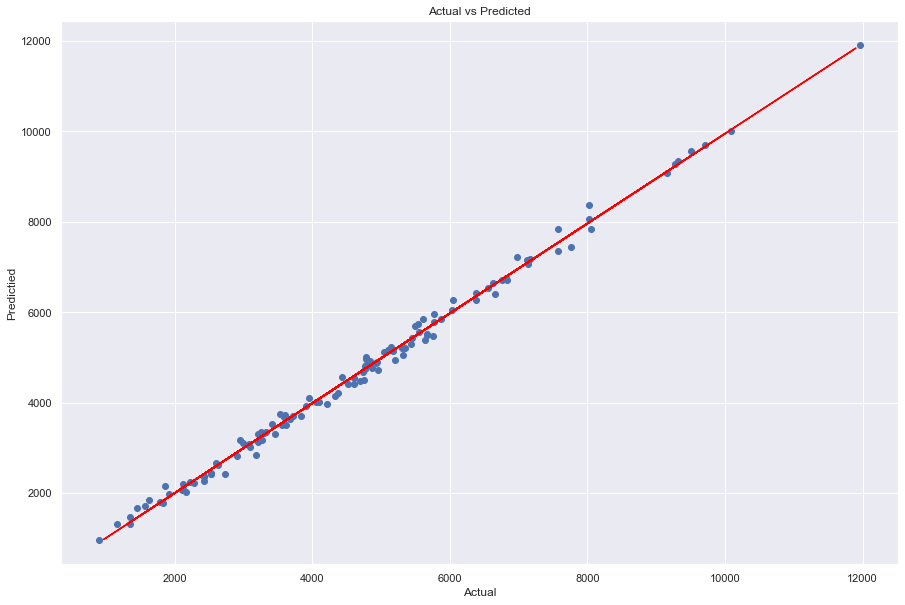

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, multiple_prediction)
slope, intercept = np.polyfit(y_test, multiple_prediction, 1)
plt.plot(multiple_prediction, slope*multiple_prediction + intercept, color='red')
plt.xlabel('Actual')
plt.ylabel('Predictied')
plt.title('Actual vs Predicted')

plt.show()

In [65]:
print('MSE:', mean_squared_error(y_test, multiple_prediction))
print('R-squared:', r2_score(y_test, multiple_prediction))

MSE: 21166.234887454717
R-squared: 0.995447413065193


The multiple linear regresssion has shown a positive strong correlation compared to the simple linear regression which is 0.5998357475575693 as we can see above. The MSE has shown 21166.234887454717, following the r2-score with 0.995447413065193. Therefore, it appears that the multiple linear regression is a better model compared to simple linear regression.    
 

# 

# Decision Tree Regression

For the decision tree regression model, it has been decided to use all the columns for our features variables because they included the negative and strong correlated columns that can be used for our machine learning building process.

In [66]:
df1.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Ethnicity',
       'Balance', 'Gender_Male', 'Student_Yes', 'Married_Yes'],
      dtype='object')

In [67]:
features = ['Income', 'Rating', 'Cards', 'Age','Education', 'Ethnicity',
       'Balance', 'Gender_Male', 'Student_Yes', 'Married_Yes']

In [68]:
x_data = df1[features].values


x_data

array([[ 14.891, 283.   ,   2.   , ...,   1.   ,   0.   ,   1.   ],
       [106.025, 483.   ,   3.   , ...,   0.   ,   1.   ,   1.   ],
       [104.593, 514.   ,   4.   , ...,   1.   ,   0.   ,   0.   ],
       ...,
       [ 57.872, 321.   ,   5.   , ...,   0.   ,   0.   ,   1.   ],
       [ 37.728, 192.   ,   1.   , ...,   1.   ,   0.   ,   1.   ],
       [ 18.701, 415.   ,   5.   , ...,   0.   ,   0.   ,   0.   ]])

In [69]:
limit_scaled= pd.DataFrame(df1["Limit"])

limit_scaled

,Limit
0,3606
1,6645
2,7075
3,9504
4,4897
...,...
395,4100
396,3838
397,4171
398,2525


In [70]:
# Separating out the target
y_data = limit_scaled["Limit"].values
y_data

array([ 3606,  6645,  7075,  9504,  4897,  8047,  3388,  7114,  3300,
        6819,  8117,  1311,  5308,  6922,  3291,  2525,  3714,  4378,
        6384,  6626,  2860,  6378,  2631,  5179,  1757,  4323,  3625,
        4534, 13414,  5611,  5666,  2733,  7838,  1829,  2646,  2558,
        6457,  6481,  3899,  3461,  3327,  7659,  4763,  6257,  6375,
        7569,  5043,  4431,  2252,  4569,  5183,  3969,  5441,  5466,
        1499,  1786,  4742,  4779,  3480,  5294,  5198,  3089,  1671,
        2998,  2937,  4160,  9704,  5099,  5619,  6819,  3954,  7402,
        4923,  4523,  5390,  3180,  3293,  3254,  6662,  2101,  3449,
        4263,  4433,  1433,  2906, 12066,  6340,  2271,  4307,  7518,
        5767,  6040,  2832,  5435,  3075,   855,  5382,  3388,  2963,
        8494,  3736,  2433,  7582,  9540,  4768,  3182,  1337,  3189,
        6033,  3261,  3271,  2959,  6637,  6386,  3326,  4828,  2117,
        9113,  2161,  1410,  1402,  8157,  7056,  1300,  2529,  2531,
        5533,  3411,

## Split dataset into training and testing sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=42)

In [72]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 10) (280,)
(120, 10) (120,)


In [73]:
decision_model = DecisionTreeRegressor()

In [74]:
decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
decision_prediction_model = decision_model.predict(X_test)

In [76]:
decision_prediction_model

array([ 8732.,  5110.,  1501.,  2959.,  5274.,  2832.,  7659.,  2963.,
        4831.,  5829.,  6645.,  4897.,  5228.,  4632.,  5466.,  4673.,
        7416.,  7398.,  5183.,  5429.,  3476.,  2330.,  6378.,  4712.,
        3480.,  3922.,  3182.,  5390.,  4270.,  4391.,  3899.,  9560.,
        9824.,  4831.,  5072.,  2001.,  5835.,  3388.,  5289.,  7056.,
        8157.,  1561.,  3000.,  4160.,  4831.,  5466.,  2308.,  5013.,
        2748.,  4378.,  5110.,  2963.,  5183.,  4229.,  4831.,  3736.,
        4828.,  4831.,  5619.,  2120.,  2531.,  2330.,  3806.,  6090.,
        2001.,  2330.,  7100.,  1774.,  5466.,  4160.,  1335.,  6135.,
        7871.,  7871.,  6645.,  3182.,  5977.,  8100.,  2586.,  3899.,
        9540.,  6617.,  1433.,  2525.,  5829.,  2860.,   855.,  3762.,
        6090.,  5829.,  2001.,  3098.,  2000.,  5829.,  3922.,  8760.,
        5352.,  7416.,  3182.,  2880.,  2001.,  2923.,  3933.,  9560.,
        4527.,  7100.,  7056.,  3098., 12066.,  5352.,  1389.,  1485.,
      

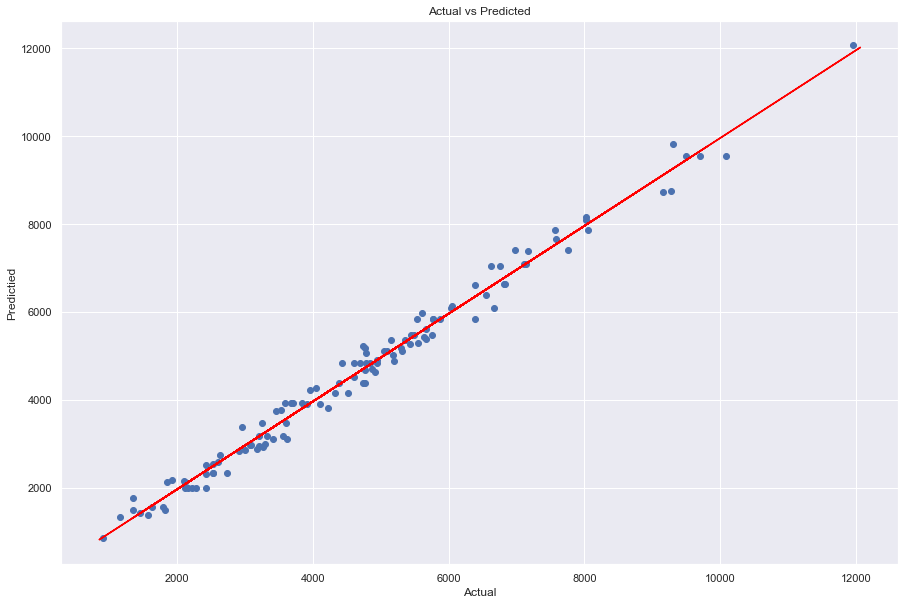

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, decision_prediction_model)
slope, intercept = np.polyfit(y_test, decision_prediction_model, 1)
plt.plot(decision_prediction_model, slope*decision_prediction_model + intercept, color='red')
plt.xlabel('Actual')
plt.ylabel('Predictied')
plt.title('Actual vs Predicted')

plt.show()

In [82]:
print('MSE:', mean_squared_error(y_test, decision_prediction_model))
print('R-squared:', r2_score(y_test, decision_prediction_model))

MSE: 64380.50833333333
R-squared: 0.9861525744822814


# Model evaluation using performance metrics¶

I selected several metrics for evaluating the performance of the simple regression, multiple regression, and decision tree regression models. These metrics are the coefficient of determination (R-squared), mean squared error (MSE), and mean absolute error (MAE). R-squared quantifies the fraction of the target variable's variance that the predictor variable accounts for, whereas MSE and MAE measure the average discrepancy between the predicted and actual values.
In general, a higher R-squared and lower MSE and MAE values suggest that the model has a better performance.


# Model Comparison

As we can see from the scatter graphs above, the multiple linear regression and the decision regression models have shown a positive strong correlation, compared to the simple linear regression which has its variables grouped at bottom left of the graph and the spreading up right. Furthermore, the multiple linear regression and the decision tree models have shown higher R-squared of 0.99 and 0.98, following the liner regression model with the lowest R-squared of 0.60. Therefore, The Multiple Linear Regression Model is the winner as the results are higher for R-Squared and lower for MAE. Also, the Multiple Linear Regression model is performing the best with the Cross-Validation results.